In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib # for saving algorithm and preprocessing objects
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder # for preprocessing


In [2]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/neon-yeen/depressing-data/master/csgo.csv', sep=";")

df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,254527.691176


In [61]:
csgo = df.copy()

In [62]:
csgo.drop("Unnamed: 0", axis=1, inplace=True)
csgo.drop("MatchKills", axis=1, inplace=True)
csgo.drop("MatchFlankKills", axis=1, inplace=True)
csgo.drop("MatchAssists", axis=1, inplace=True)
csgo.drop("MatchHeadshots", axis=1, inplace=True)
csgo.drop("AvgMatchKillDist", axis=1, inplace=True)
csgo.drop('AbnormalMatch', axis=1, inplace=True)

In [63]:
csgo.Map = csgo.Map.replace({'de_dust2': 1, 'de_mirage': 2, 'de_inferno': 3, 'de_nuke': 4})
csgo.Team = csgo.Team.replace({'Terrorist': 0, 'CounterTerrorist': 1})
csgo.RoundWinner = csgo.RoundWinner.replace({True: 1, False: 0})
csgo.MatchWinner = csgo.MatchWinner.replace({True: 1, False: 0})
csgo.Survived = csgo.Survived.replace({True: 1, False: 0})


In [67]:
pd.set_option('display.max_columns', None)
csgo.loc[[1]]


,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue
1,3,0,1,4,1,76561197971812216,0,1,0,43.486626,0.81861,547137.458474,60960.883185,87.839889,0.0,5.415945e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400


In [58]:
encoders = {"Map":"StandardScaler()",
            "Team":"StandardScaler()",
            "InternalTeamId":"StandardScaler()",
            "MatchId":"StandardScaler()",
            "RoundId":"StandardScaler()",
            "SteamId":"StandardScaler()",
            "RoundWinner":"StandardScaler()",
            "Survived":"StandardScaler()",
            "TimeAlive":"StandardScaler()",
            "ScaledTimeAlive":"StandardScaler()",
            "AvgCentroidDistance":"StandardScaler()",
            "TravelledDistance":"StandardScaler()",
            "AvgRoundVelocity":"StandardScaler()",
            "AvgKillDistance":"StandardScaler()",
            "AvgSiteDistance":"StandardScaler()",
            "RLethalGrenadesThrown":"StandardScaler()",
            "RNonLethalGrenadesThrown":"StandardScaler()",
            "PrimaryAssaultRifle":"StandardScaler()",
            "PrimarySniperRifle":"StandardScaler()",
            "PrimaryHeavy":"StandardScaler()",
            "PrimarySMG":"StandardScaler()",
            "PrimaryPistol":"StandardScaler()",
            "FirstKillTime":"StandardScaler()",
            "RoundKills":"StandardScaler()",
            "RoundAssists":"StandardScaler()",
            "RoundHeadshots":"StandardScaler()",
            "RoundFlankKills":"StandardScaler()",
            "RoundStartingEquipmentValue":"StandardScaler()",
            "TeamStartingEquipmentValue":"StandardScaler()"
    
}

In [51]:
#Aplicamos StandardScaler a las variables previamente mencionadas

scaled_features = csgo

col_names = [
            "Map",
            "Team",
            "InternalTeamId",
            "MatchId",
            "RoundId",
            "SteamId",
            "RoundWinner",
            "Survived",
            "TimeAlive",
            "ScaledTimeAlive",
            "AvgCentroidDistance",
            "TravelledDistance",
            "AvgRoundVelocity",
            "AvgKillDistance",
            "AvgSiteDistance",
            "RLethalGrenadesThrown",
            "RNonLethalGrenadesThrown",
            "PrimaryAssaultRifle",
            "PrimarySniperRifle",
            "PrimaryHeavy",
            "PrimarySMG",
            "PrimaryPistol",
            "FirstKillTime",
            "RoundKills",
            "RoundAssists",
            "RoundHeadshots",
            "RoundFlankKills",
            "RoundStartingEquipmentValue",
            "TeamStartingEquipmentValue"
            ]


features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
#confirmamos los cambios
scaled_features

,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,TimeAlive,...,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue
0,0.560116,-0.999659,-1.000013,-1.648370,-1.582921,1.329481,-0.999735,1,-0.822531,-0.448575,...,-0.078992,-0.085457,1.873187,-1.790847,-0.761346,-0.379093,-0.520961,-0.298257,-1.434258,-1.487214
1,0.560116,-0.999659,-1.000013,-1.648370,-1.582921,-0.620647,-0.999735,1,-0.822531,-0.606553,...,-0.078992,-0.085457,1.873187,-1.790847,-0.761346,-0.379093,-0.520961,-0.298257,-1.410576,-1.487214
2,0.560116,-0.999659,-1.000013,-1.648370,-1.582921,-0.607828,-0.999735,1,-0.822531,-0.733454,...,-0.078992,-0.085457,1.873187,-1.790847,-0.761346,-0.379093,-0.520961,-0.298257,-1.315846,-1.487214
3,0.560116,-0.999659,-1.000013,-1.648370,-1.582921,-0.500582,-0.999735,1,-0.822531,-0.519795,...,-0.078992,-0.085457,1.873187,-1.790847,-0.761346,-0.379093,-0.520961,-0.298257,-1.386893,-1.487214
4,0.560116,-0.999659,-1.000013,-1.648370,-1.582921,-0.964176,-0.999735,1,1.215759,-0.407138,...,-0.078992,-0.085457,1.873187,-1.790847,-0.761346,-0.379093,-0.520961,-0.298257,-1.315846,-1.487214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,-0.422751,1.000341,0.999987,1.741645,-1.044765,0.967974,-0.999735,0,-0.822531,-0.802316,...,-0.078992,-0.085457,-0.533850,-1.088410,-0.761346,-0.379093,-0.520961,-0.298257,0.862935,0.842630
79153,-0.422751,1.000341,0.999987,1.741645,-1.044765,0.223388,-0.999735,0,-0.822531,-0.900952,...,-0.078992,-0.085457,-0.533850,-0.905271,0.372707,-0.379093,1.206634,-0.298257,0.815571,0.842630
79154,-0.422751,1.000341,0.999987,1.741645,-1.044765,0.626270,-0.999735,0,-0.822531,-0.282457,...,-0.078992,-0.085457,-0.533850,-0.872739,-0.761346,-0.379093,-0.520961,-0.298257,0.555064,0.842630
79155,-0.422751,1.000341,0.999987,1.741645,-1.044765,-0.614937,-0.999735,0,-0.822531,-0.625257,...,-0.078992,-0.085457,-0.533850,0.530929,-0.761346,-0.379093,-0.520961,-0.298257,0.555064,0.842630


In [52]:
#Funcion para mostrar matriz de confunsion

LABELS = ["Victoria","Derrota"]

%matplotlib inline
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Matriz de confunsion")
    plt.ylabel('Clase verdadera')
    plt.xlabel('Clase prediccion')
    plt.show()
    print (classification_report(y_test, pred_y))

In [53]:
y = csgo['MatchWinner']
X = csgo.drop('MatchWinner', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [54]:
# Definimos el modelo de random tree con profundidad de 100
model = RandomForestClassifier(n_estimators=300, 
                               bootstrap = True,verbose=2,
                               max_features = 'sqrt')
# Entrenamos
model=model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 300


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.1min finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.6s finished


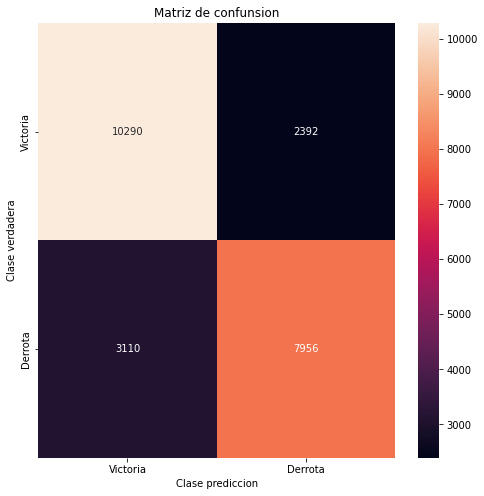

              precision    recall  f1-score   support

           0       0.77      0.81      0.79     12682
           1       0.77      0.72      0.74     11066

    accuracy                           0.77     23748
   macro avg       0.77      0.77      0.77     23748
weighted avg       0.77      0.77      0.77     23748



In [55]:
#calculamos y representamos la matriz de confunsion  ademas de los puntajes de precision, recall, f1-score y support
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [56]:
# Calculate roc auc
roc_value = roc_auc_score(y_test, pred_y)
print(roc_value)

0.7651725950585999


In [59]:
joblib.dump(model, "./random_forest.joblib", compress=True)
joblib.dump(encoders, "./encoders.joblib", compress=True)

['./encoders.joblib']